Data untuk provinsi Maluku sebelum diproses:
    provinsi   jumlah  tahun
30    Maluku  496.000   2022
65    Maluku    0.000   2021
100   Maluku    1.086   2020
135   Maluku    1.272   2019
170   Maluku    1.090   2018
205   Maluku    1.090   2017
240   Maluku  569.000   2016
275   Maluku  569.000   2015

TimeSeries untuk provinsi Maluku sebelum diproses:
2022    496.000
2021      0.000
2020      1.086
2019      1.272
2018      1.090
2017      1.090
2016    569.000
2015    569.000
dtype: float64


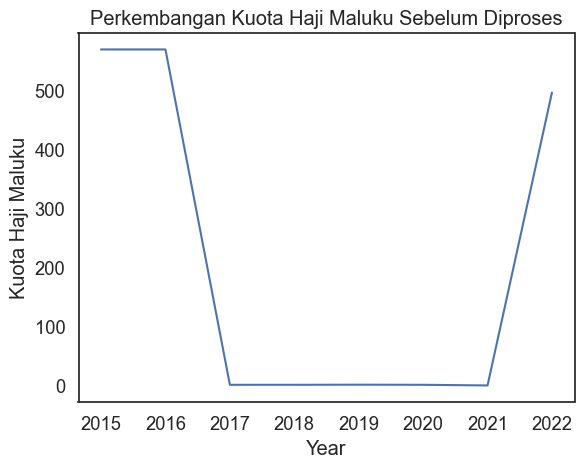

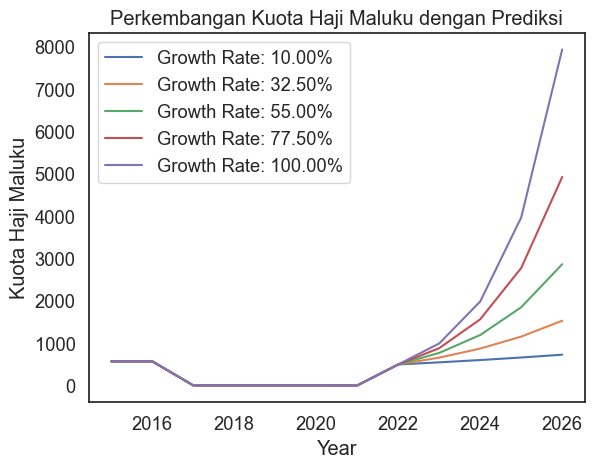

Hasil prediksi untuk provinsi Maluku
Growth Rate: 10.00%, Prediksi Kuota Tahun 2027: 798.813
Growth Rate: 10.00%, Prediksi Kuota Tahun 2028: 878.694
Growth Rate: 10.00%, Prediksi Kuota Tahun 2029: 966.564
Growth Rate: 10.00%, Prediksi Kuota Tahun 2030: 1063.220
Growth Rate: 10.00%, Prediksi Kuota Tahun 2031: 1169.542
Growth Rate: 32.50%, Prediksi Kuota Tahun 2027: 2025.634
Growth Rate: 32.50%, Prediksi Kuota Tahun 2028: 2683.966
Growth Rate: 32.50%, Prediksi Kuota Tahun 2029: 3556.254
Growth Rate: 32.50%, Prediksi Kuota Tahun 2030: 4712.037
Growth Rate: 32.50%, Prediksi Kuota Tahun 2031: 6243.449
Growth Rate: 55.00%, Prediksi Kuota Tahun 2027: 4437.518
Growth Rate: 55.00%, Prediksi Kuota Tahun 2028: 6878.154
Growth Rate: 55.00%, Prediksi Kuota Tahun 2029: 10661.138
Growth Rate: 55.00%, Prediksi Kuota Tahun 2030: 16524.764
Growth Rate: 55.00%, Prediksi Kuota Tahun 2031: 25613.384
Growth Rate: 77.50%, Prediksi Kuota Tahun 2027: 8739.236
Growth Rate: 77.50%, Prediksi Kuota Tahun 2028: 155

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from modsim import *

# Membaca data
data = pd.read_csv("Perkembangan Kuota Jemaah Haji Menurut Provinsi.csv")

# Fungsi untuk membuat TimeSeries dari data yang belum diproses
def make_time_series(data):
    time_series = TimeSeries()
    for index, row in data.iterrows():
        year = row['tahun']
        jumlah = row['jumlah']
        time_series[year] = jumlah
    return time_series

# Fungsi untuk filter data berdasarkan provinsi
def filter_data_by_province(data, province):
    return data[data['provinsi'] == province]

# Input dari pengguna untuk provinsi
province = input("Masukkan nama provinsi: ")

# Fungsi untuk filter data berdasarkan provinsi
data_provinsi = filter_data_by_province(data, province)

# Cetak data provinsi sebelum diproses
print("Data untuk provinsi", province, "sebelum diproses:")
print(data_provinsi)

# Buat TimeSeries dari data yang belum diproses
time_series_provinsi = make_time_series(data_provinsi)

# Cetak TimeSeries yang dibuat
print("\nTimeSeries untuk provinsi", province, "sebelum diproses:")
print(time_series_provinsi)

# Plot TimeSeries
plt.plot(time_series_provinsi)
plt.xlabel('Year')
plt.ylabel(f'Kuota Haji {province}')
plt.title(f'Perkembangan Kuota Haji {province} Sebelum Diproses')
plt.show()

# Menginisialisasi System
def make_system(data, growth_rate, pred_years):
    initial_year = data['tahun'].min()
    final_year = data['tahun'].max() + pred_years
    provinsi = data['provinsi'].unique()[0]
    
    return System(initial_year=initial_year,
                  final_year=final_year,
                  provinsi=provinsi,
                  growth_rate=growth_rate)

# Membuat State awal
def make_initial_state(system, data):
    initial_kuota = data[data['tahun'] == system.initial_year]['jumlah'].sum()
    return State(year=system.initial_year, kuota=initial_kuota)

# Update function untuk State
def update_state(state, system, t, data):
    current_year = int(t)
    yearly_data = data[data['tahun'] == current_year]
    
    if not yearly_data.empty:
        kuota = yearly_data['jumlah'].sum()
    else:
        if current_year <= system.final_year:
            kuota = state.kuota * (1 + system.growth_rate)
        else:
            return None  # Mengembalikan None untuk menandakan akhir iterasi
    
    return State(year=current_year, kuota=kuota)

# Membuat Timeseries
def run_simulation(system, initial_state, data):
    t_array = linrange(system.initial_year, system.final_year)
    results = TimeSeries()
    
    state = initial_state
    for t in t_array:
        state = update_state(state, system, t, data)
        if state is None:
            break  # Berhenti iterasi jika mencapai tahun terakhir yang diprediksi
        results[t] = state.kuota
    
    return results

# SweepSeries untuk mensimulasikan berbagai growth_rate
def simulate_province(data, province, growth_rates, pred_years):
    data_provinsi = filter_data_by_province(data, province)
    sweep = SweepSeries()
    
    for rate in growth_rates:
        system = make_system(data_provinsi, rate, pred_years)
        initial_state = make_initial_state(system, data_provinsi)
        results = run_simulation(system, initial_state, data_provinsi)
        sweep[rate] = results
    
    return sweep

# Parameter simulasi
pred_years = 5  # Jumlah tahun prediksi

# Input dari pengguna untuk provinsi dan growth rates yang diinginkan
province = input("Masukkan nama provinsi: ")
min_growth_rate = float(input("Masukkan growth rate minimum (misal, 0.01 untuk 1%): "))
max_growth_rate = float(input("Masukkan growth rate maksimum (misal, 0.1 untuk 10%): "))
num_growth_rates = int(input("Masukkan jumlah nilai growth rate yang diinginkan (misal, 5): "))

# Membuat linspace untuk growth rates
growth_rates = linspace(min_growth_rate, max_growth_rate, num_growth_rates)

# Jalankan simulasi untuk provinsi yang dipilih
sweep = simulate_province(data, province, growth_rates, pred_years)

# Plotting results
for rate, series in sweep.items():
    plt.plot(series, label=f'Growth Rate: {rate:.2%}')

plt.xlabel('Year')
plt.ylabel(f'Kuota Haji {province}')
plt.title(f'Perkembangan Kuota Haji {province} dengan Prediksi')
plt.legend()
plt.show()

# Cetak hasil prediksi
print("Hasil prediksi untuk provinsi", province)
for rate, series in sweep.items():
    final_year = int(series.index[-1])
    for i in range(1, 6):
        predicted_quota = series[final_year] * (1 + rate) ** i
        print(f'Growth Rate: {rate:.2%}, Prediksi Kuota Tahun {final_year + i}: {predicted_quota:.3f}')
